# Week 1: Our Approach to Modelling Data
## [Peter Hurley](http://www.sussex.ac.uk/profiles/188689) and [Phil Rooney](http://www.sussex.ac.uk/profiles/252374) 

## Bayesian Probability

### Medical Example

### Saturn Example

### Bayesian Inference

## Probabilistic Programming

Machine learning = black box

#### Neuro example of black box problems

## Generative modelling

## Graphical Models

No single agreed notation but:

Always: 

Nodes represent variables and graph structure represent dependencies

Almost Always: 

Plates indicate replication

Optional Distinctions: 

Continuous vs Discrete
Observed vs Hidden 
Stocastic vs Deterministic
Observed Variables vs Known Property of Experimental Design

### Binary process

### Real world: Sprinkler grass wet

## Pros and Cons


# Examples
-----------------

## Single Variable



In [54]:

import pystan
import numpy as np
import seaborn as sns
from astropy.table import Table
%matplotlib inline


one_var_model = """

// Inferring a Rate
data { 
  int<lower=1> n; 
  int<lower=0> k;
} 
parameters {
  real<lower=0,upper=1> theta;
} 
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  
  // Observed Counts
  k ~ binomial(n, theta);
}
"""

k = 9
n = 20

#k = 407
#n = 800

input_data = {'k':k, 'n':n}

fit_onevar = pystan.stan(model_code=one_var_model, data=input_data, iter=10000, chains=4)


fit_onevar



Inference for Stan model: anon_model_08f3dae424b59a035b3b9af363c1083c.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.45  1.6e-3    0.1   0.26   0.38   0.45   0.53   0.66 4219.0    1.0
lp__  -15.67    0.01   0.73 -17.73 -15.84 -15.39 -15.21 -15.16 4550.0    1.0

Samples were drawn using NUTS(diag_e) at Mon Jul 18 10:43:54 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

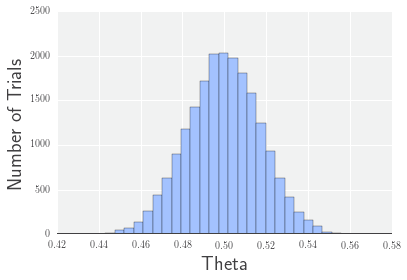

In [41]:

from __future__ import unicode_literals

import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True

import csv
import numpy as np
import matplotlib.pyplot as plt	x
from matplotlib.ticker import ScalarFormatter

samples=fit_onevar.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,0].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('Theta', fontsize=20)

plt.show()


## Schools 

## $p$ values

In [52]:
pearson_model = """
// Pearson Correlation
data { 
  int<lower=0> n;
  vector[2] x[n];
}
parameters {
  vector[2] mu;
  vector<lower=0>[2] lambda;
  real<lower=-1,upper=1> r;
} 
transformed parameters {
  vector<lower=0>[2] sigma;
  cov_matrix[2] T;
  // Reparameterization
  sigma[1] <- inv_sqrt(lambda[1]);
  sigma[2] <- inv_sqrt(lambda[2]);
  T[1,1] <- square(sigma[1]);
  T[1,2] <- r * sigma[1] * sigma[2];
  T[2,1] <- r * sigma[1] * sigma[2];
  T[2,2] <- square(sigma[2]);
}
model {
  // Priors
  mu ~ normal(0, inv_sqrt(.001));
  lambda ~ gamma(.001, .001);
  
  // Data
  x ~ multi_normal(mu, T);
}
"""

#pearson_data = np.matrix([[.8,102], [1.0,98], [.5,100], [.9,105], [.7,103], [.4,110], [1.2,99], [1.4,87], [.6,113], [1.1,89], [1.3,93]])
pearson_data = np.matrix([[.8,102,],[1.0,98,],[.5,100,],[.9,105,],[.7,103,],[.4,110,],[1.2,99,],[1.4,87,],[.6,113,],[1.1,89,],[1.3,93,],[.8,102,],[1.0,98,],[.5,100,],[.9,105,],[.7,103,],[.4,110,],[1.2,99,],[1.4,87,],[.6,113,],[1.1,89,],[1.3,93]])
#n = 11
n = 22
parameters ={"r", "mu", "sigma"}

data = {'x':pearson_data, 'n':n}

samples_pearson = pystan.stan(model_code=pearson_model, data=data, iter=10000, chains=4)

samples_pearson

Inference for Stan model: anon_model_cbdffd142e6b5f7643dd9a16a8322d7b.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       0.91  1.1e-3   0.07   0.77   0.86   0.91   0.96   1.05 4012.0    1.0
mu[1]      99.63    0.03   1.73  96.24   98.5  99.64 100.75 103.07 4100.0    1.0
lambda[0]   9.89    0.05   2.98   4.97   7.77   9.61   11.7  16.56 4253.0    1.0
lambda[1]   0.02  7.7e-5 5.0e-3 8.4e-3   0.01   0.02   0.02   0.03 4211.0    1.0
r          -0.76  1.5e-3   0.09   -0.9  -0.83  -0.78  -0.71  -0.53 3727.0    1.0
sigma[0]    0.33  8.2e-4   0.05   0.25   0.29   0.32   0.36   0.45 4014.0    1.0
sigma[1]     8.0    0.02   1.25   6.02    7.1   7.84   8.73  10.89 3995.0    1.0
T[0,0]      0.11  5.8e-4   0.04   0.06   0.09    0.1   0.13    0.2 3960.0    1.0
T[1,0]     -2.07    0.01   0.77  -3.97  -2.44  -1.94  -1.52  -0.98 3271.0    1.0

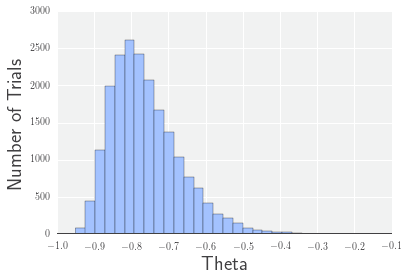

In [53]:

samples=samples_pearson.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,4].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('r', fontsize=20)

plt.show()

$\kappa$ Values

In [26]:
kappa_model ="""
// Kappa Coefficient of Agreement
data { 
  int<lower=0> y[4];
}
parameters {
  // Underlying Rates
  // Rate Objective Method Decides 'one'
  real<lower=0,upper=1> alpha;
  // Rate Surrogate Method Decides 'one' When Objective Method Decides 'one'
  real<lower=0,upper=1> beta;
  // Rate Surrogate Method Decides 'zero' When Objective Method Decides 'zero'
  real<lower=0,upper=1> gamma;
} 
transformed parameters {
  simplex[4] pi;
  real xi;
  real psi;
  real kappa;
  // Probabilities For Each Count
  pi[1] <- alpha * beta;
  pi[2] <- alpha * (1 - beta);
  pi[3] <- (1 - alpha) * (1 - gamma);
  pi[4] <- (1 - alpha) * gamma;
    
  // Derived Measures   
  // Rate Surrogate Method Agrees With the Objective Method
  xi <- alpha * beta + (1 - alpha) * gamma ;
  // Rate of Chance Agreement
  psi <- (pi[1] + pi[2]) * (pi[1] + pi[3]) + (pi[2] + pi[4]) * (pi[3] + pi[4]);  
  // Chance-Corrected Agreement
  kappa <- (xi - psi) / (1 - psi);
}
model {
  alpha ~ beta(1, 1);  // could be removed
  beta ~ beta(1, 1);  // could be removed
  gamma ~ beta(1, 1);  // could be removed
  // Count Data     
  y ~ multinomial(pi);
}
"""
# CHOOSE a data set:
# Influenza 
y = {14, 4, 5, 210}
# Hearing Loss 
# y <- {20, 7, 103, 417}
# Rare Disease
# y <- {0, 0, 13, 157}

data = {'y':y}
parameters = {"kappa", "xi", "psi", "alpha", "beta", "gamma", "pi"}

In [ ]:
samples=samples_kappa.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,4].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('r', fontsize=20)

plt.show()

## Regression

#### Correlated Errors

## Gaussian Mixtures Modelling